# **Coronavirus in North America (data visualization)**
#### by David Smolinski
___
<br>

### **Stay safe by seeing how the virus is spreading.**
___
Compare the rate of change of coronavirus data (confirmed outbreaks, deaths, and recoveries) throughout North America. I made tables and plots (graphs) for Canada, Mexico, and the United States (including every state). Run this online to update the data and view deaths and recoveries.

Data source: Johns Hopkins University (They claim to get it from the WHO (World Health Organization).)

Most of this work involved filtering and grouping data. 

Please share the social media posts, like, comment, and subscribe. As of making this, I'm open to employment opportunities and freelance work. I'm studying ES6 and ReactJS, so this was a distraction.
___
<br>

### **To learn more about COVID-19, run this Python code online.**
___
Run the Google Colab version of this online to see the most recent data. Johns Hopkins updates this dataset daily. Change the code to view data with your own custom parameters. To view deaths and recoveries, change the value of "url_difference". Lookup how to run Jupyter Notebooks in Google Colab to learn how to do this.
___
<br>

### **Rules for using this open source code**
___
Reference me, and try to include a link to my code. Try to give me the link/name of the app (ideally through social media) when it's done.
___
<br>

### **Links:**
___
[My resume](docs.google.com/document/d/1NmaSZmUnfOo0ZlQYJZyDy648Fhi-4z7evU47rpatxZ4)

My code
- [Portfolio](https://github.com/DavidSmolinski/portfolio/tree/master/table%20of%20contents)
- [Predict whether you are happy on my website.](https://moresomervillehappinessapp.herokuapp.com/home)

This program: [Github](https://github.com/DavidSmolinski/portfolio/blob/master/data%20visualization/coronavirus.ipynb), [Google Colab](https://colab.research.google.com/drive/1WruvAdiwnlcC2klg6u9A6SFcUMnbTFy6)

My social media: [LinkedIn](https://www.linkedin.com/in/davidsmolinski/), [Facebook](https://www.facebook.com/david.smolinski.9)

References
- [Johns Hopkins University's coronavirus page](https://coronavirus.jhu.edu/)
- [The dataset](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv)
- [US regions](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf)
___
<br>


In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

url_difference = 'Confirmed'
# url_difference = 'Deaths'
# url_difference = 'Recovered'

url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-{url_difference}.csv'
df = pd.read_csv(url, delimiter=',', index_col = False)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('columns in the original dataset')
df.head(1)

columns in the original dataset


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0,101.0,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599,599.0


In [2]:
df = df.rename(columns={'Province/State': 'Province_or_State', 'Country/Region': 'Country_Region',})

def make_country_df(country):
    country_df = df.loc[df.Country_Region == country, :]
    cols_to_drop = ['Country_Region', 'Lat', 'Long']
    country_df = country_df.sort_values(by=['Province_or_State'])
    return country_df.drop(cols_to_drop, axis=1)
    
df_us = make_country_df('US')
df_canada = make_country_df('Canada')
df_mexico = make_country_df('Mexico')

print('data for all the United States locations')
df_us

data for all the United States locations


,Province_or_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
241,"Adams, IN",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
414,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,6,12,29,39,46,78,83,131,138,138.0
361,"Alachua, FL",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
281,"Alameda County, CA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
141,Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,6,9,12,15,21,21.0
383,"Anoka, MN",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
227,"Arapahoe, CO",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
118,Arizona,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,9,9,9,12,13,18,20,27,45,78,118,152,152.0
142,Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,6,12,16,22,22,33,62,96,122,165,165.0
233,"Arlington, VA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [0]:
northeast = ('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island',
               'Vermont', 'New Jersey', 'New York', 'Pennsylvania',)
midwest = ('Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 
           'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota',)
south = ('Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 
         'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 
         'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas',)
west = ('Arizona', 'Colorado', 'Idaho', 'New Mexico', 'Montana', 'Utah', 'Nevada', 
        'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington',)
all_states = northeast + midwest + south + west

In [4]:
# Only keep rows where Province_or_State is a state.
df_us = df_us.loc[df.Province_or_State.isin(all_states), :]
print(f"this week's {url_difference} cases data for all states in the United States")
pd.concat([df_us.iloc[:, 0], df_us.iloc[:, -7:]], axis=1)

this week's Confirmed cases data for all states in the United States


,Province_or_State,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
414,Alabama,39,46,78,83,131,138,138.0
141,Alaska,3,6,9,12,15,21,21.0
118,Arizona,20,27,45,78,118,152,152.0
142,Arkansas,22,33,62,96,122,165,165.0
100,California,698,751,952,1177,1364,1642,1642.0
105,Colorado,160,184,277,363,390,476,476.0
129,Connecticut,68,68,159,194,194,223,223.0
143,Delaware,16,19,30,38,45,47,47.0
106,Florida,216,314,417,563,659,830,830.0
104,Georgia,146,199,287,420,507,600,600.0


In [6]:
canadian_provinces = ['British Columbia',
 'Ontario',
 'Alberta',
 'Quebec',
 'New Brunswick',
 'Manitoba',
 'Saskatchewan']
print(f"this week's {url_difference} cases data for Canada")
pd.concat([df_canada.iloc[:, 0], df_canada.iloc[:, -7:]], axis=1)

this week's Confirmed cases data for Canada


,Province_or_State,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
93,Alberta,74,97,119,146,195,259,259.0
5,British Columbia,103,186,231,271,424,424,424.0
411,Grand Princess,8,9,9,10,10,13,13.0
406,Manitoba,8,15,17,17,18,19,20.0
201,New Brunswick,8,11,11,11,17,17,17.0
433,Newfoundland and Labrador,3,3,3,4,6,6,9.0
477,Northwest Territories,0,0,0,0,1,1,1.0
441,Nova Scotia,7,12,14,15,21,28,28.0
92,Ontario,185,221,257,308,377,425,425.0
434,Prince Edward Island,1,1,2,2,2,2,3.0


In [8]:
print(f"this week's {url_difference} cases data for Mexico")
pd.concat([df_mexico.iloc[:, 0], df_mexico.iloc[:, -7:]], axis=1)

this week's Confirmed cases data for Mexico


,Province_or_State,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
46,NaN,82,93,118,164,203,251,251.0


In [0]:
def plot(region, region_string, days = 'all', df=df_us):
    """makes a line plot
    :param region: [list of strings] states/provinces
    :param region_string: [string] geographic region's name
    :param days: [int] number of days to plot
    :param df: [dataframe]
    """
    region_df = df.loc[df.Province_or_State.isin(region), :]
    region_df = region_df.set_index('Province_or_State')
    region_df = region_df.swapaxes("index", "columns")
    if days != 'all':
        days = int(days)
        rows = len(region_df)
        start_day = rows - days
        if start_day < 0:
            start_day = 0
        region_df = region_df.iloc[start_day:(rows), :]  
    region_df.plot()
    plt.title(f'Coronavirus ({url_difference}): Region: {region_string}, Days:{days}')
    plt.xlabel('Day')
    plt.ylabel(f'Total ({url_difference})')
    plt.xticks(rotation='vertical')
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.show()
    plt.clf()  

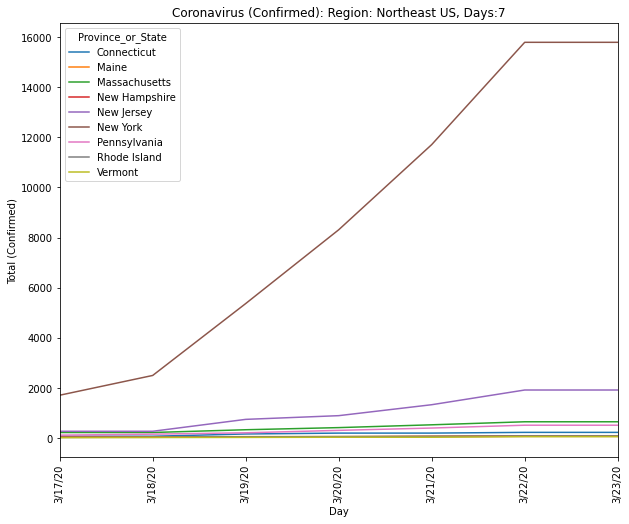

<Figure size 432x288 with 0 Axes>

In [10]:
plot(region=northeast, region_string='Northeast US', days=7)  

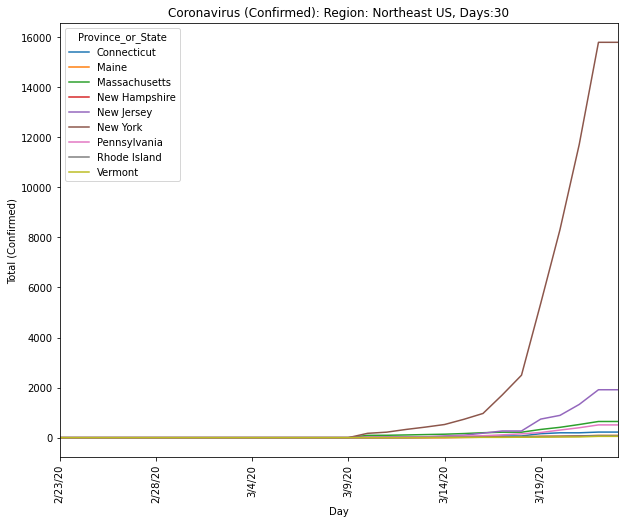

<Figure size 432x288 with 0 Axes>

In [11]:
plot(region=northeast, region_string='Northeast US', days=30)  

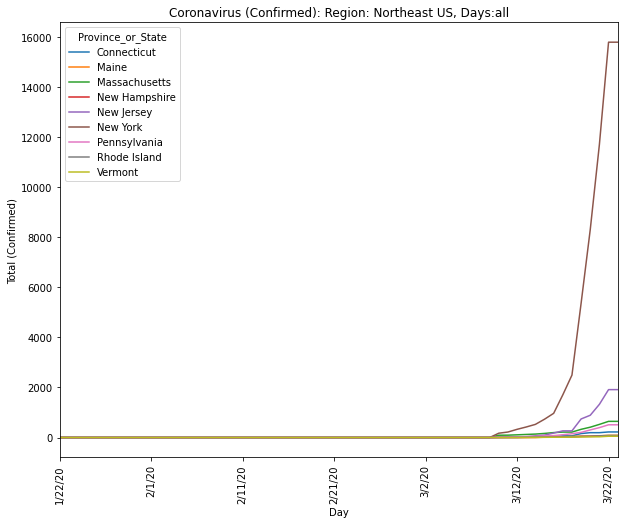

<Figure size 432x288 with 0 Axes>

In [12]:
plot(region=northeast, region_string='Northeast US', days='all')  

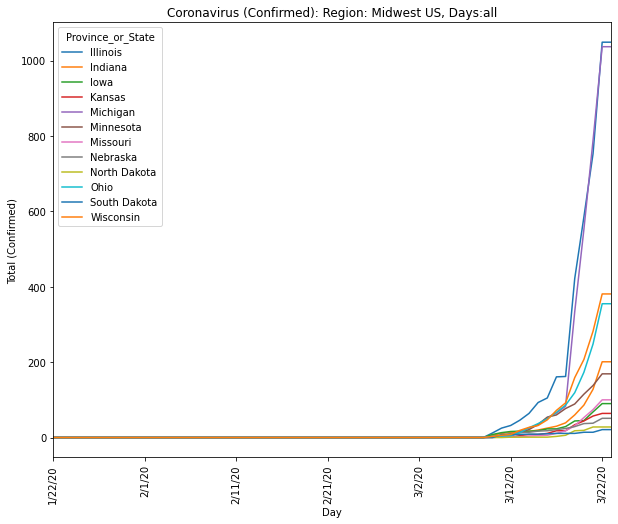

<Figure size 432x288 with 0 Axes>

In [13]:
plot(region=midwest, region_string='Midwest US', days='all')  

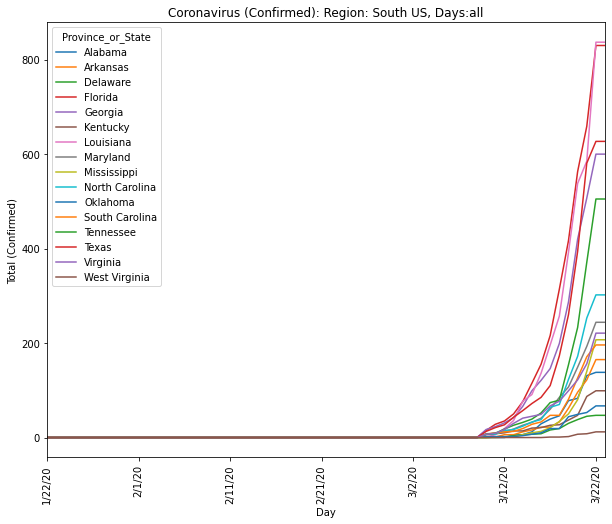

<Figure size 432x288 with 0 Axes>

In [14]:
plot(region=south, region_string='South US', days='all')  

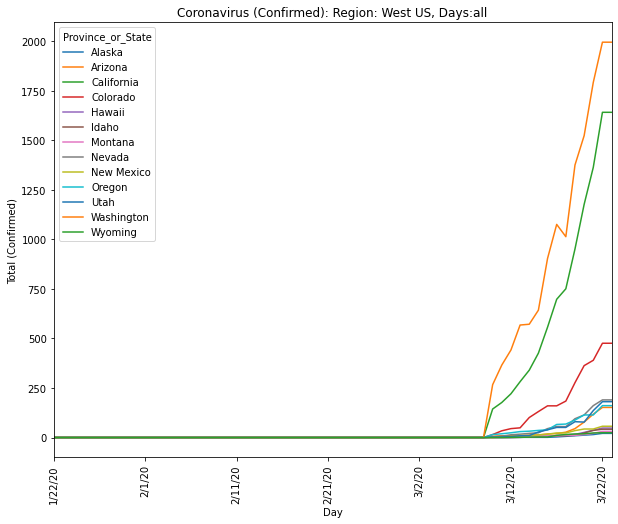

<Figure size 432x288 with 0 Axes>

In [15]:
plot(region=west, region_string='West US', days='all')  

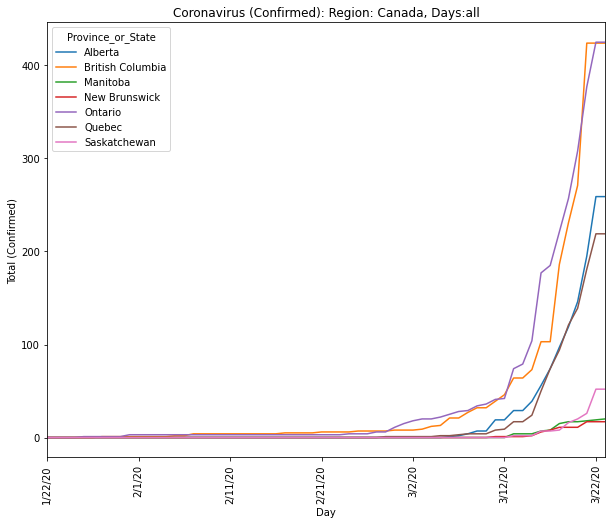

<Figure size 432x288 with 0 Axes>

In [16]:
canadian_provinces = ['British Columbia',
 'Ontario',
 'Alberta',
 'Quebec',
 'New Brunswick',
 'Manitoba',
 'Saskatchewan']
plot(region=canadian_provinces, region_string='Canada', days='all', df=df_canada)

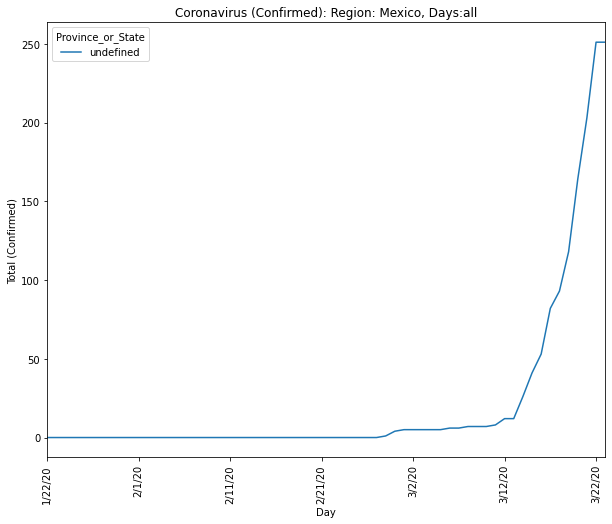

<Figure size 432x288 with 0 Axes>

In [17]:
df_mexico.Province_or_State = df_mexico.Province_or_State.fillna('undefined')
plot(region=['undefined'], region_string='Mexico', days='all', df=df_mexico)

keywords: covid-19, datascience, epidemiology, python, statistics, science, math